In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Desktop\github_projects\deep_learning\weight_initialization_techniques\dataset\ushape.csv')

In [3]:
df.set_axis(['X', 'Y', 'class'], axis=1)

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


In [4]:
df.columns

Index(['3.159499363321345566e-02', '9.869877579082642072e-01',
       '0.000000000000000000e+00'],
      dtype='object')

In [5]:
df.columns = ['X', 'Y', 'class']

In [6]:
df.head(4)

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0


In [7]:
print(df.head())
print(df.columns)


          X         Y  class
0  2.115098 -0.046244    1.0
1  0.882490 -0.075756    0.0
2 -0.055144 -0.037332    1.0
3  0.829545 -0.539321    1.0
4  2.112857  0.662084    1.0
Index(['X', 'Y', 'class'], dtype='object')


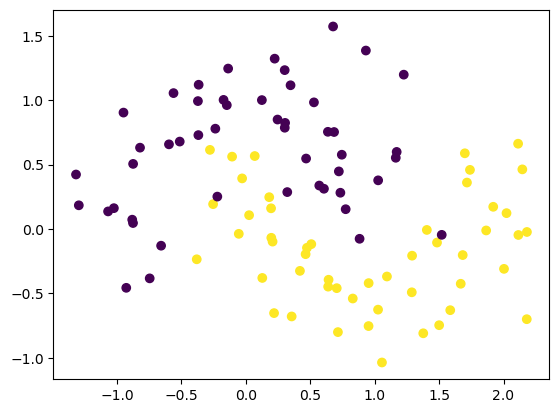

In [8]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [9]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split 

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
import torch

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor   = torch.tensor(X_val,   dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val_tensor   = torch.tensor(y_val,   dtype=torch.float32).view(-1, 1)

In [15]:
import torch 
import torch.nn as nn 

In [17]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,10)
        self.fc2 = nn.Linear(10,1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x 
    

In [18]:
model = Model()
print(model)

Model(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [19]:
weights_before = {
    name: param.detach().clone()
    for name, param in model.named_parameters()
    
}

In [35]:
print(weights_before)

{'fc1.weight': tensor([[-0.5353, -0.2096],
        [-0.6310,  0.5698],
        [ 0.1222, -0.0757],
        [-0.4712,  0.3004],
        [ 0.1710,  0.5109],
        [ 0.6020, -0.3590],
        [ 0.1287,  0.0877],
        [ 0.2414, -0.1299],
        [ 0.2967,  0.5649],
        [ 0.4584,  0.1113]]), 'fc1.bias': tensor([ 0.0619, -0.2706, -0.5056,  0.1603,  0.5502, -0.5745, -0.3986,  0.6337,
         0.1623,  0.4309]), 'fc2.weight': tensor([[ 0.1919, -0.0375,  0.1533, -0.0659, -0.0045,  0.2582,  0.2819,  0.1110,
          0.2504,  0.1353]]), 'fc2.bias': tensor([0.1293])}


In [20]:
with torch.no_grad():
    for param in model.parameters():
        param.zero_()

In [21]:
for name, param in model.named_parameters():
    print(name, torch.sum(param))

fc1.weight tensor(0., grad_fn=<SumBackward0>)
fc1.bias tensor(0., grad_fn=<SumBackward0>)
fc2.weight tensor(0., grad_fn=<SumBackward0>)
fc2.bias tensor(0., grad_fn=<SumBackward0>)


In [22]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [23]:
train_loss = []
test_loss = []

In [24]:
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    train_loss.append(loss.item())

In [25]:
weights_after = {
    name : param.detach().clone()
    for name, param in model.named_parameters()
}

In [36]:
print(weights_after)

{'fc1.weight': tensor([[ 0.1335, -0.1344],
        [ 0.1335, -0.1344],
        [ 0.1335, -0.1344],
        [ 0.1335, -0.1344],
        [ 0.1335, -0.1344],
        [ 0.1335, -0.1344],
        [ 0.1335, -0.1344],
        [ 0.1335, -0.1344],
        [ 0.1335, -0.1344],
        [ 0.1335, -0.1344]]), 'fc1.bias': tensor([-0.1350, -0.1350, -0.1350, -0.1350, -0.1350, -0.1350, -0.1350, -0.1350,
        -0.1350, -0.1350]), 'fc2.weight': tensor([[0.0524, 0.0524, 0.0524, 0.0524, 0.0524, 0.0524, 0.0524, 0.0524, 0.0524,
         0.0524]]), 'fc2.bias': tensor([-0.1116])}


In [26]:
with torch.no_grad():
    val_outputs = model(X_val_tensor)
    val_loss = loss_fn(val_outputs, y_val_tensor)
    
    test_loss.append(val_loss.item())

In [27]:
for k in weights_before:
    diff = torch.sum(torch.abs(weights_after[k]- weights_before[k]))
    print(k, diff.item())

fc1.weight 6.470679759979248
fc1.bias 4.018779754638672
fc2.weight 1.280151128768921
fc2.bias 0.240923672914505


In [29]:
print(train_loss)

[0.6931471228599548, 0.6931138038635254, 0.6930879950523376, 0.6930694580078125, 0.6930575966835022, 0.6930510997772217, 0.6930482983589172, 0.6930466294288635, 0.6930443644523621, 0.6930400729179382, 0.693033754825592, 0.693025529384613, 0.6930162906646729, 0.6930066347122192, 0.6929972767829895, 0.6929883360862732, 0.6929800510406494, 0.6929717063903809, 0.6929633021354675, 0.6929541826248169, 0.692943811416626, 0.69293212890625, 0.6929190754890442, 0.6929047107696533, 0.6928891539573669, 0.6928726434707642, 0.6928550601005554, 0.6928366422653198, 0.6928173303604126, 0.6927971243858337, 0.6927758455276489, 0.6927534937858582, 0.6927298903465271, 0.6927051544189453, 0.6926789879798889, 0.6926514506340027, 0.6926226019859314, 0.692592442035675, 0.6925608515739441, 0.6925278902053833, 0.692493736743927, 0.6924580335617065, 0.6924209594726562, 0.6923823356628418, 0.6923421621322632, 0.6923003196716309, 0.6922569870948792, 0.6922118663787842, 0.6921652555465698, 0.6921169757843018, 0.6920

In [28]:
print(test_loss)

[0.6887547969818115]


In [32]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]


In [33]:
with torch.no_grad():
    grid_t = torch.tensor(grid, dtype=torch.float32)
    probs = model(grid_t).numpy().reshape(xx.shape)


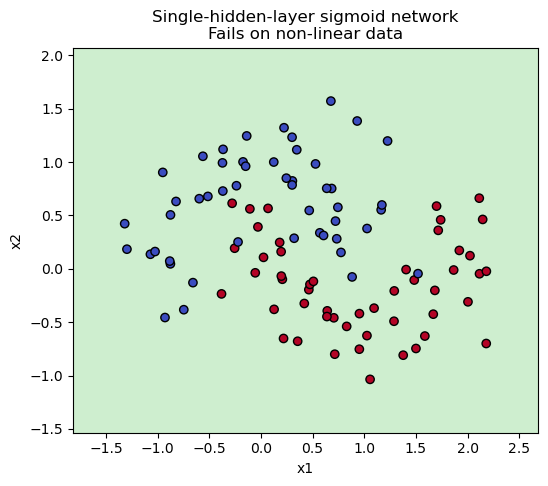

In [34]:
plt.figure(figsize=(6,5))

# decision boundary
plt.contourf(xx, yy, probs >= 0.5, alpha=0.3)

# data points
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='coolwarm')

plt.title("Single-hidden-layer sigmoid network\nFails on non-linear data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


: 